**Task 1 :
Plot all sample points (train data) from both classes, but samples from the same class should have
the same color and marker.**

In [1]:
import matplotlib.pyplot as plt

In [18]:
trainData = {}
entry = []

with open("train.txt") as f:
    for line in f:
        entry = line.split(" ")
        if (entry[2][-1] == '\n'):
            classInfo =  entry[2][:-1]
        else:
            classInfo =  entry[2]
        trainData[(int(entry[0]),int(entry[1]))] = int(classInfo)
    print(trainData)

{(2, 2): 1, (3, 1): 1, (-4, 3): 2, (3, 3): 1, (-1, -3): 1, (2, 6): 2, (4, 2): 1, (-2, -2): 1, (0, 0): 2, (-2, 2): 2, (-1, -1): 2, (-4, 2): 2}


In [35]:
trainData1x = []
trainData1y = []
trainData2x = []
trainData2y = []

for coor , classinfo in trainData.items():
    if(classinfo == 1):
        trainData1x.append(coor[0]);
        trainData1y.append(coor[1]);
    else:
        trainData2x.append(coor[0]);
        trainData2y.append(coor[1]);
    
print(trainData1x , trainData1y)
print(trainData2x , trainData2y)


[2, 3, 3, -1, 4, -2] [2, 1, 3, -3, 2, -2]
[-4, 2, 0, -2, -1, -4] [3, 6, 0, 2, -1, 2]


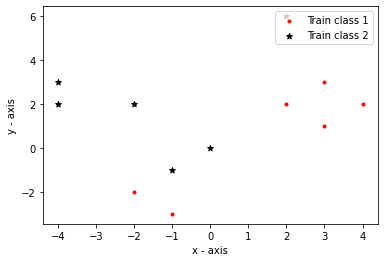

In [114]:
plt.scatter(trainData1x, trainData1y, color = 'r', marker = ".", label = 'Train class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'Train class 2')

plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.legend(loc = 'upper right', prop={'size': 10})

plt.show()


**Task 2 :
Using a minimum distance classifier with respect to ‘class mean’, classify the test data points by
plotting them with the designated class-color but a different marker.**

In [54]:
classMeanX1 = sum(trainData1x) / len(trainData1x)
classMeanY1 = sum(trainData1y) / len(trainData1y)

classMeanX2 = sum(trainData2x) / len(trainData2x)
classMeanY2 = sum(trainData2y) / len(trainData2y)
print(classMeanX1 , classMeanY1 , classMeanX2 , classMeanY2  )

1.5 0.5 -1.5 2.0


In [58]:
testData = {}
entry = []

with open("test.txt") as f:
    for line in f:
        entry = line.split(" ")
        if (entry[2][-1] == '\n'):
            classInfo =  entry[2][:-1]
        else:
            classInfo =  entry[2]
        testData[(int(entry[0]),int(entry[1]))] = int(classInfo)
    print(testData)

{(-1, -5): 1, (3, 2): 1, (-2, 1): 2, (8, 2): 1, (6, -1): 1, (0, 2): 1, (-3, 0): 2}


In [60]:
testData1x = []
testData1y = []
testData2x = []
testData2y = []

for coor , classinfo in testData.items():
    if(classinfo == 1):
        testData1x.append(coor[0]);
        testData1y.append(coor[1]);
    else:
        testData2x.append(coor[0]);
        testData2y.append(coor[1]);
    
print(testData1x , testData1y)
print(testData2x , testData2y)

[-1, 3, 8, 6, 0] [-5, 2, 2, -1, 2]
[-2, -3] [1, 0]


In [61]:
prediction = testData.copy()
prediction


{(-1, -5): 1,
 (3, 2): 1,
 (-2, 1): 2,
 (8, 2): 1,
 (6, -1): 1,
 (0, 2): 1,
 (-3, 0): 2}

In [83]:
def gofX(point,miu):
    value = 0
    value = np.dot( np.transpose( miu), point) - .5*np.dot( np.transpose( miu), miu)
    
    return value;

In [84]:
def predictClass(point,miu1 , miu2):
    predictedClass = 0
    
    if(gofX(point,miu1) > gofX(point,miu2)):
        return 1
    else:
        return 2
    
    return predictedClass
    

In [208]:
import numpy as np

miu1 = np.array([classMeanX1 , classMeanY1 ])
miu2 = np.array([classMeanX2 , classMeanY2 ])

for eachEntry in prediction.keys():
    eachEntry = np.array([t for t in eachEntry])
    print(eachEntry, miu1 , miu2 )
    prediction[eachEntry[0],eachEntry[1] ] = predictClass (eachEntry, miu1 , miu2 )
    
prediction
    

[-1 -5] [1.5 0.5] [-1.5  2. ]
[3 2] [1.5 0.5] [-1.5  2. ]
[-2  1] [1.5 0.5] [-1.5  2. ]
[8 2] [1.5 0.5] [-1.5  2. ]
[ 6 -1] [1.5 0.5] [-1.5  2. ]
[0 2] [1.5 0.5] [-1.5  2. ]
[-3  0] [1.5 0.5] [-1.5  2. ]


{(-1, -5): 1,
 (3, 2): 1,
 (-2, 1): 2,
 (8, 2): 1,
 (6, -1): 1,
 (0, 2): 2,
 (-3, 0): 2}

In [86]:
predictionData1x = []
predictionData1y = []
predictionData2x = []
predictionData2y = []

for coor , classinfo in prediction.items():
    if(classinfo == 1):
        predictionData1x.append(coor[0]);
        predictionData1y.append(coor[1]);
    else:
        predictionData2x.append(coor[0]);
        predictionData2y.append(coor[1]);
    
print(predictionData1x , predictionData1y)
print(predictionData2x , predictionData2y)

[-1, 3, 8, 6] [-5, 2, 2, -1]
[-2, 0, -3] [1, 2, 0]


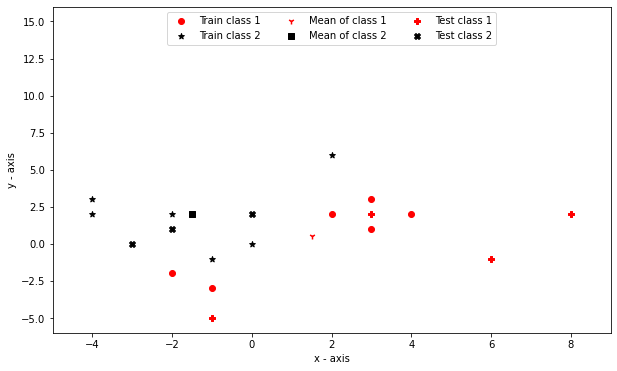

In [120]:
plt.figure(1,figsize = (10 , 6))

plt.scatter(trainData1x, trainData1y, color = 'r', marker = "o", label = 'Train class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'Train class 2')

##means

plt.scatter(classMeanX1, classMeanY1, color = 'r', marker = "1", label = 'Mean of class 1')

plt.scatter(classMeanX2, classMeanY2, color = 'k', marker = "s", label = 'Mean of class 2')

##prediction

plt.scatter(predictionData1x , predictionData1y, color = 'r', marker = "P", label = 'Test class 1')

plt.scatter(predictionData2x , predictionData2y, color = 'k', marker = "X", label = 'Test class 2')



plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.axis([-5 ,9 ,-6 , 16])

plt.legend(loc='upper center', ncol=3)

plt.show()

**Task 3 :
Draw the decision boundary between the two classes**

In [212]:
decisionBoundaryX = []
decisionBoundaryY = []

for i in range(-5 , 9):
    decisionBoundaryX.append(i)
    

miuterm = miu1 -  miu2

miuX = miu1[0] -  miu2[0]

miuY = miu1[1] -  miu2[1]


for eachX in decisionBoundaryX:
    decisionBoundaryY.append( (0.5 * (((miu1[0] * miu1[0]) + (miu1[1] * miu1[1])) - ((miu2[0] * miu2[0]) + (miu2[1] * miu2[1]))) - (eachX * miuX)) / miuY
     )
    
    
    
    #decisionBoundaryX

print(decisionBoundaryY)



[-2.25  1.  ]
[-8.75, -6.75, -4.75, -2.75, -0.75, 1.25, 3.25, 5.25, 7.25, 9.25, 11.25, 13.25, 15.25, 17.25]


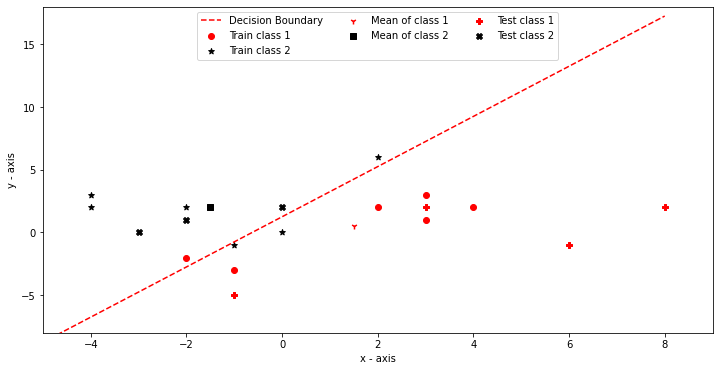

In [223]:
plt.figure(1,figsize = (12 , 6))

plt.scatter(trainData1x, trainData1y, color = 'r', marker = "o", label = 'Train class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'Train class 2')

##means

plt.scatter(classMeanX1, classMeanY1, color = 'r', marker = "1", label = 'Mean of class 1')

plt.scatter(classMeanX2, classMeanY2, color = 'k', marker = "s", label = 'Mean of class 2')

##prediction

plt.scatter(predictionData1x , predictionData1y, color = 'r', marker = "P", label = 'Test class 1')

plt.scatter(predictionData2x , predictionData2y, color = 'k', marker = "X", label = 'Test class 2')

#decision boundary
plt.plot(decisionBoundaryX , decisionBoundaryY, "--r", label = 'Decision Boundary')



plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.axis([-5 ,9 ,-8 , 18])

plt.legend(loc='upper center', ncol=3)

plt.show()

**Task 4 :
Find accuracy.**

In [140]:
def getAccuracy(prediction , testData):
    correct = 0 
    for key ,item in prediction.items():
        if (item == testData[key]):
            correct +=1
            
    return correct / len(prediction)

In [150]:
print ( "Accuracy " + str(format(getAccuracy(prediction , testData)*100, '.2f')))

Accuracy 85.71
